# Milestone 2 Phase 1

Name: Julio Putra David

Batch: 10

___________

## **1. Introduction**

This notebook will cover the establishments of several supervised machine learning models to predict the price of Spanish Wine. The dataset that will be used is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality. `Price` is the target variable. We will predict the price of the wine without knowning the name of the wine and winery.

_**Citation:**_

    fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

## **2. Import Libraries**

In [1]:
# Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np 
from scipy.stats import pearsonr

# Pre-processing Libraries
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer, DropMissingData
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer

# Regression Algorithm Libraries
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Model Evaluation Metrics Libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Warning Neglect Library
import warnings
warnings.filterwarnings('ignore')

## **3. Data Loading**

In [2]:
df = pd.read_csv('wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [3]:
r = df.shape[0]
c = df.shape[1]
print('Number of rows    =', r)
print('Number of columns =', c)

Number of rows    = 7500
Number of columns = 11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


Make a copy of the original dataset.

In [5]:
data = df.copy()

## **4. Exploratory Data Analysis (EDA)**

#### **1. List of numerical columns**

In [6]:
num_data = data.select_dtypes(include=np.number).columns.tolist()
num_data

['rating', 'num_reviews', 'price', 'body', 'acidity']

#### **2. List of categorical columns**

In [7]:
data.select_dtypes(include=['object','category']).columns.tolist()

['winery', 'wine', 'year', 'country', 'region', 'type']

In [8]:
data.nunique(axis=0, dropna=False)

winery          480
wine            847
year             72
rating            8
num_reviews     817
country           1
region           76
price          1292
type             22
body              5
acidity           4
dtype: int64

In [9]:
data[data['wine']=='Reserva']

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
276,Hacienda Monasterio,Reserva,2017,4.6,64,Espana,Ribera del Duero,50.000000,Ribera Del Duero Red,5.0,3.0
382,Pago de Carraovejas,Reserva,2014,4.5,1148,Espana,Ribera del Duero,69.580324,Ribera Del Duero Red,5.0,3.0
397,Hacienda Monasterio,Reserva,2015,4.5,629,Espana,Ribera del Duero,53.950000,Ribera Del Duero Red,5.0,3.0
423,Hacienda Monasterio,Reserva,2016,4.5,297,Espana,Ribera del Duero,55.950000,Ribera Del Duero Red,5.0,3.0
473,Dominio del Aguila,Reserva,2018,4.5,141,Espana,Ribera del Duero,59.800000,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7445,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.980000,Rioja Red,4.0,3.0
7451,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.500000,Rioja Red,4.0,3.0
7470,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.980000,Rioja Red,4.0,3.0
7476,La Vicalanda,Reserva,2015,4.2,420,Espana,Rioja,17.500000,Rioja Red,4.0,3.0


#### **3. Descriptive Statistics**

In [10]:
data.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


#### **4. Missing Values Detection**

In [11]:
data.isnull().any()

winery         False
wine           False
year            True
rating         False
num_reviews    False
country        False
region         False
price          False
type            True
body            True
acidity         True
dtype: bool

#### **5. Distribution of Features**

In [12]:
# This is the function for checking the skewness of the columns

def skew_check(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        print(f'[Gaussian] Skewness of {column} =', skewness)
    else:
        print(f'[Skewed] Skewness of {column} =', skewness)

In [13]:
for feature in data.select_dtypes(include=np.number).columns:
    skew_check(data, feature)

[Skewed] Skewness of rating = 2.4434745058974765
[Skewed] Skewness of num_reviews = 17.85606162561893
[Skewed] Skewness of price = 9.643681639976837
[Gaussian] Skewness of body = -0.19899269531188457
[Skewed] Skewness of acidity = -5.008214324371584


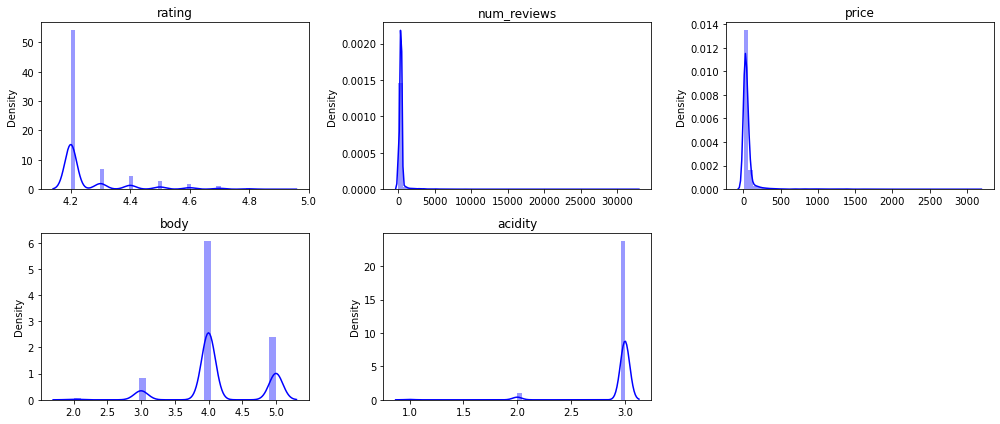

In [14]:
plt.figure(figsize=(14,6))
for i in range(0,len(data.select_dtypes(include=np.number).columns)):
    plt.subplot(2,3, i+1)
    sns.distplot(x=data[data.select_dtypes(include=np.number).columns[i]], color='blue')
    plt.title(f'{data.select_dtypes(include=np.number).columns[i]}')
    plt.tight_layout()

#### **6. Boxplot Analysis**

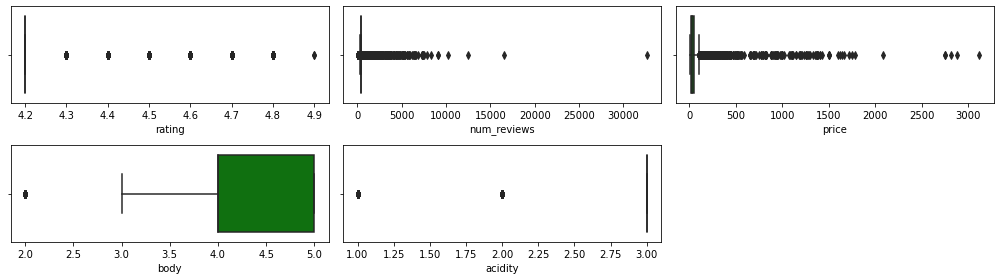

In [15]:
plt.figure(figsize=(14,4))
for i in range(0,len(data.select_dtypes(include=np.number).columns)):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=data[data.select_dtypes(include=np.number).columns[i]], color='green')
    plt.tight_layout()

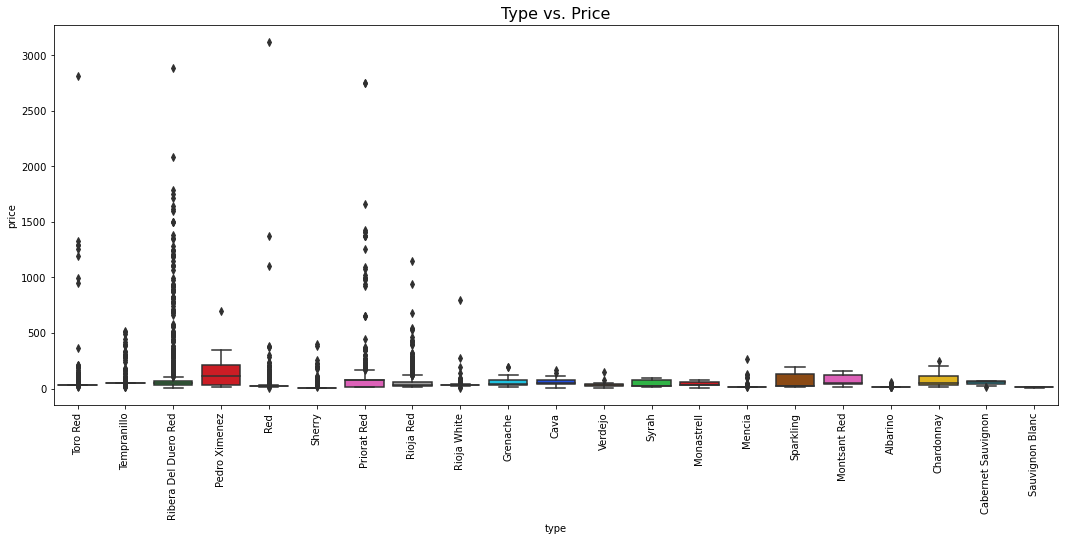

In [16]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='type', data=data, ax=ax, palette='bright')
plt.title('Type vs. Price', fontsize=16)
plt.xticks(rotation=90)
plt.show()

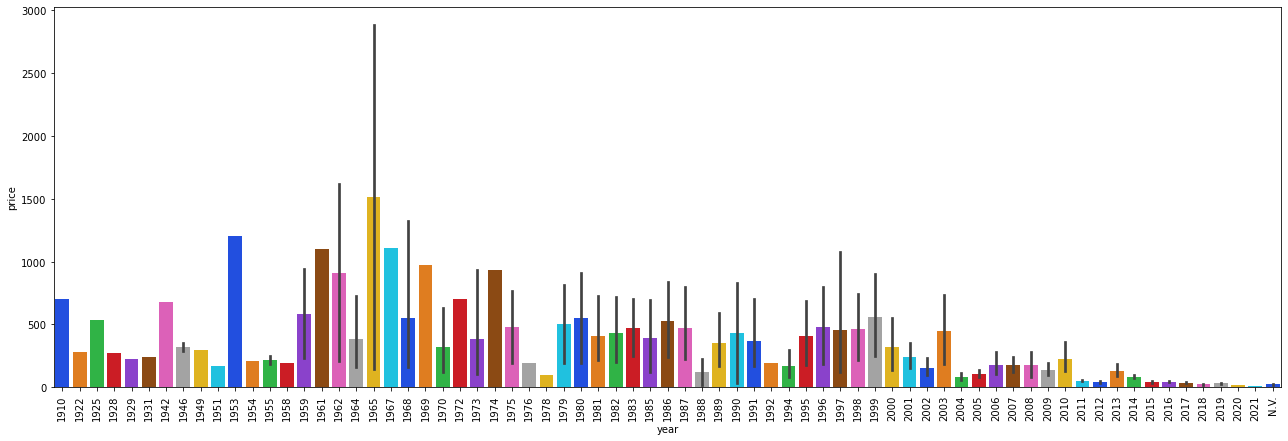

In [17]:
fig, ax = plt.subplots(ncols=1, figsize=(22,7))
sns.barplot(y='price', x='year', data=data.sort_values('year'), ax=ax, palette='bright')
plt.xticks(rotation=90)
plt.show()

In [18]:
data.year.unique()

array(['2013', '2018', '2009', '1999', '1996', '1998', '2010', '1995',
       '2015', '2011', '2016', '1970', '1946', '1962', '2019', '2004',
       'N.V.', '1931', '1979', '2005', '2020', '2014', '1985', '1929',
       '2007', '2012', '2017', '2008', nan, '2006', '2000', '2003',
       '2002', '1991', '1994', '1990', '1989', '1987', '1986', '1981',
       '2001', '1968', '1964', '1982', '1974', '1983', '1955', '1980',
       '1972', '1953', '1958', '1942', '1965', '1992', '1973', '1997',
       '1967', '1975', '1910', '1961', '1954', '1988', '1969', '1951',
       '1928', '1976', '1949', '2021', '1959', '1922', '1978', '1925'],
      dtype=object)

In [19]:
data[data['year']=='N.V.'][['year']].count()

year    288
dtype: int64

N.V. is short for Non-Vintage wines.

According to McWilliam's Wines website, a vintage wine is one made from grapes that were all, or primarily, grown and picked in a single specified year. Each vintage wine has a unique flavour profile reflective of the fruit picked during that year.

A non-vintage wine is created by blending together a number wines from different vintages. In a lot of the wine descriptions when you look for the vintage year and see “NV”, this designates a Non Vintage wine.

Because we do not have any numerical value to represent the Non-Vintage wines, we will drop them out.

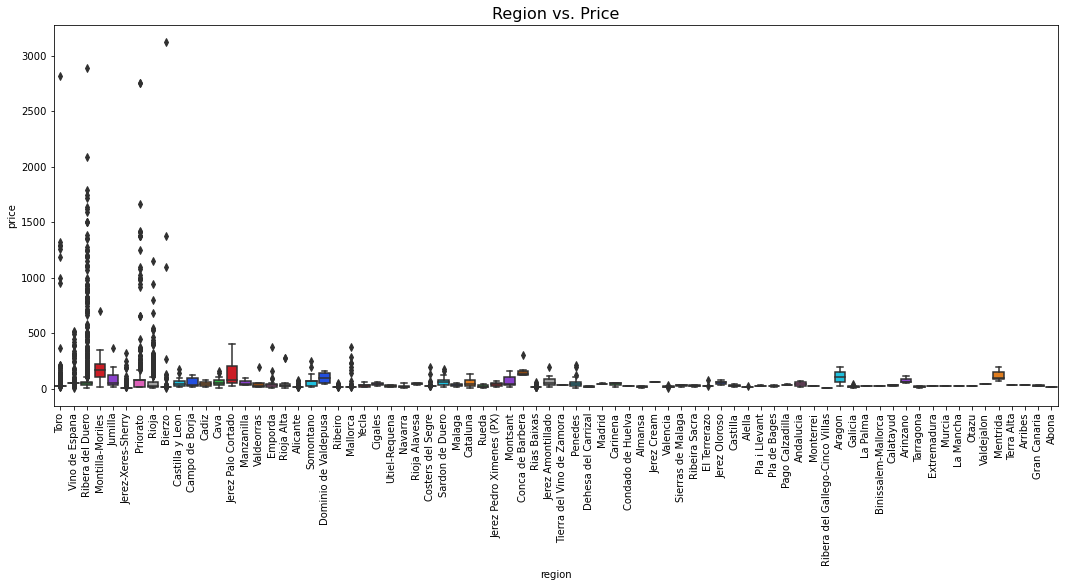

In [20]:
fig, ax = plt.subplots(ncols=1, figsize=(18,7))
sns.boxplot(y='price', x='region', data=data, ax=ax, palette='bright')
plt.title('Region vs. Price', fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### **Country**

In [21]:
data['country'].unique()

array(['Espana'], dtype=object)

We will drop `country` because it has only one value.

## **5. Data Pre-processing**

### **5.1 Feature Engineering**

Drop `country`

In [22]:
data.drop(['country'], axis=1, inplace=True)

Drop `N.V.` in `year`

In [23]:
data.drop(data.loc[data['year']=='N.V.'].index, inplace=True)

Convert `year` into integer.

In [24]:
data['year'] = pd.to_numeric(data['year'], errors='ignore')
data.dropna(subset=['year'], inplace=True)
data['year'] = data['year'].astype('int64')

### **5.2 High Cardinality Reduction**

We have high cardinality on `type`. Now we will reduce the cardinality by using a simple Aggregating function below. (*Source code*: https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b)

In [25]:
from collections import Counter
def cumulatively_categorise(column,threshold=0.75,return_categories_list=True):
    threshold_value=int(threshold*len(column))    
    categories_list=[]                            
    s=0                                           
    counts=Counter(column)                        
    
    for i,j in counts.most_common():
        s+=dict(counts)[i] 
        categories_list.append(i)
        if s>=threshold_value:
            break
    categories_list.append('Other')

    new_column=column.apply(lambda x: x if x in categories_list else 'Other')

    if(return_categories_list):
        return new_column,categories_list
    else:
        return new_column

In [26]:
reduced_type, new_type_list = cumulatively_categorise(data['type'],threshold=0.8,return_categories_list=True)
reduced_wine, new_wine_list = cumulatively_categorise(data['wine'],threshold=0.8,return_categories_list=True)
reduced_winery, new_winery_list = cumulatively_categorise(data['winery'],threshold=0.8,return_categories_list=True)
reduced_region, new_wine_list = cumulatively_categorise(data['region'],threshold=0.8,return_categories_list=True)

In [27]:
data['type_reduced'] = reduced_type
data.drop('type', axis=1, inplace=True)

data['wine_reduced'] = reduced_wine
data.drop('wine', axis=1, inplace=True)

data['winery_reduced'] = reduced_winery
data.drop('winery', axis=1, inplace=True)

data['region_reduced'] = reduced_region
data.drop('region', axis=1, inplace=True)

### **5.3 Inference Dataset**

We will take out 10 samples from the dataset to be our inference dataset.

In [28]:
data_inf = data.sample(10, random_state=77)

Dropping the data that has been assigned as inference.

In [29]:
data.drop(data_inf.index, inplace=True)

Resetting the index to prevent unwanted errors.

In [30]:
data.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

### **5.3 Data Splitting**

75% for train set and 25% for test set.

In [31]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
print('Size of feature training data :', X_train.shape)
print('Size of feature testing data  :', X_test.shape)
print('Size of target training data :', y_train.shape)
print('Size of target testing data  :', y_test.shape)

Size of feature training data : (5400, 9)
Size of feature testing data  : (1800, 9)
Size of target training data : (5400,)
Size of target testing data  : (1800,)


### **5.4 Handling Outliers**

In [33]:
# This is the function to detect how many outliers in each column

def detect_otl(data, column):
    skewness = data[column].skew(axis = 0, skipna = True)
    if skewness <= 0.5 and skewness >= -0.5:
        upper_boundary = data[column].mean() + 1.5 * data[column].std()
        lower_boundary = data[column].mean() - 1.5 * data[column].std()
        print(f'[Gaussian] Skewness of {column} =', skewness)
        print('% above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('% below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-'*75)
    else:
        IQR = data[column].quantile(0.75) - data[column].quantile(0.25)
        lower_boundary = data[column].quantile(0.25) - (IQR * 1.5)
        upper_boundary = data[column].quantile(0.75) + (IQR * 1.5)
        print(f'[Skewed] Skewness of {column} =', skewness)
        print('% above upper boundary : {}'.format(len(data[data[column] > upper_boundary]) / len(data) * 100))
        print('% below lower boundary : {}'.format(len(data[data[column] < lower_boundary]) / len(data) * 100))
        print('-'*75)

Since `body` and `acidity` are ordinal data, we will not handle their outliers.

In [34]:
for i in ['rating', 'num_reviews']:
    detect_otl(X_train, i)

[Skewed] Skewness of rating = 2.4813884918907227
% above upper boundary : 23.833333333333336
% below lower boundary : 0.0
---------------------------------------------------------------------------
[Skewed] Skewness of num_reviews = 9.534345426000874
% above upper boundary : 7.2407407407407405
% below lower boundary : 17.833333333333336
---------------------------------------------------------------------------


We will cap the outliers.

In [35]:
winsorizer = Winsorizer(capping_method='iqr', 
                        tail='both',
                        fold=1.5,
                        variables=['rating', 'num_reviews'])

X_train_capped = winsorizer.fit_transform(X_train)
print('X_train dataset - Before Capping')
print(X_train.describe())
print('')
print('X_train dataset - After Capping')
print(X_train_capped.describe())

X_train dataset - Before Capping
              year       rating   num_reviews         body      acidity
count  5400.000000  5400.000000   5400.000000  4520.000000  4520.000000
mean   2013.483333     4.253981    453.263333     4.165044     2.945354
std       7.052872     0.117212    632.469771     0.589214     0.246014
min    1910.000000     4.200000     25.000000     2.000000     1.000000
25%    2011.000000     4.200000    389.000000     4.000000     3.000000
50%    2015.000000     4.200000    404.000000     4.000000     3.000000
75%    2017.000000     4.200000    415.000000     5.000000     3.000000
max    2021.000000     4.900000  16505.000000     5.000000     3.000000

X_train dataset - After Capping
              year        rating  num_reviews         body      acidity
count  5400.000000  5.400000e+03  5400.000000  4520.000000  4520.000000
mean   2013.483333  4.200000e+00   398.795741     4.165044     2.945354
std       7.052872  4.183708e-13    27.919007     0.589214     0.24601

### **5.5 Handling Missing Values**

First, we will check number of missing values in X_train and X_test.

In [36]:
X_train_capped.isnull().sum()

year                0
rating              0
num_reviews         0
body              880
acidity           880
type_reduced      404
wine_reduced        0
winery_reduced      0
region_reduced      0
dtype: int64

In [37]:
X_test.isnull().sum()

year                0
rating              0
num_reviews         0
body              257
acidity           257
type_reduced      131
wine_reduced        0
winery_reduced      0
region_reduced      0
dtype: int64

Next, we will determine the type of the missing values, whether it is MAR (Missing At Random), MNAR (Missing Not At Random), or MCAR (Missing Completely At Random).

In [38]:
data.loc[data.isna().any(axis=1)].tail()

,year,rating,num_reviews,price,body,acidity,type_reduced,wine_reduced,winery_reduced,region_reduced
7142,2020,4.2,404,19.90,NaN,NaN,NaN,Nounat,Binigrau,Mallorca
7164,2020,4.2,407,11.95,NaN,NaN,NaN,Treixadura,Ramon do Casar,Other
7166,2020,4.2,404,19.90,NaN,NaN,NaN,Nounat,Binigrau,Mallorca
7188,2020,4.2,407,11.95,NaN,NaN,NaN,Treixadura,Ramon do Casar,Other
7190,2020,4.2,404,19.90,NaN,NaN,NaN,Nounat,Binigrau,Mallorca


Based on the data above, `type`, `body`, and `acidity` are categorized as **MNAR**, because when the type is unknown it is not possible to know the richness and weight of the wine (body) and the acidity. Since `type`, `body`, and `acidity` are ordinal variables, we will impute them with their respective **modes**.

In [39]:
mode_imputer = CategoricalImputer(imputation_method='frequent',
                                  variables=['type_reduced', 'body', 'acidity'],
                                  ignore_format=True)

X_train_ipt = mode_imputer.fit_transform(X_train)
X_test_ipt = mode_imputer.transform(X_test)

In [41]:
X_train_ipt.isnull().sum()

year              0
rating            0
num_reviews       0
body              0
acidity           0
type_reduced      0
wine_reduced      0
winery_reduced    0
region_reduced    0
dtype: int64

In [42]:
X_test_ipt.isnull().sum()

year              0
rating            0
num_reviews       0
body              0
acidity           0
type_reduced      0
wine_reduced      0
winery_reduced    0
region_reduced    0
dtype: int64

Then we will equalize the length of X_train_ipt and y_train according to their matching indices.

In [43]:
y_train_new = y_train[X_train_ipt.index]
y_test_new = y_test[X_test_ipt.index]

In [44]:
print(X_train_ipt.shape)
print(y_train_new.shape)
print(X_test_ipt.shape)
print(y_test_new.shape)

(5400, 9)
(5400,)
(1800, 9)
(1800,)


### **5.6 Feature Selection**

In [45]:
y_train_df = pd.DataFrame(y_train_new, columns=['price'])

In [46]:
feature_selection = X_train_ipt.copy()
feature_selection['price'] = y_train_df['price']
feature_selection.shape

(5400, 10)

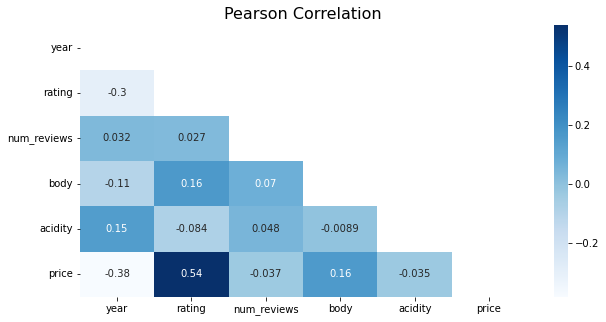

In [47]:
plt.figure(figsize=(10,5))
sns.heatmap(feature_selection.corr(),annot=True, mask=np.triu(feature_selection.corr()), cmap='Blues')
plt.title('Pearson Correlation', fontsize=16)
plt.show()

We will choose `year`, `rating`, and `body`.

In [144]:
X_train_drop = X_train_ipt.drop(['num_reviews', 'acidity'], axis=1)
X_test_drop = X_test_ipt.drop(['num_reviews', 'acidity'], axis=1)

# X_train_drop = X_train_ipt.copy()
# X_test_drop = X_test_ipt.copy()

In [145]:
X_train_drop.isnull().sum()

year              0
rating            0
body              0
type_reduced      0
wine_reduced      0
winery_reduced    0
region_reduced    0
dtype: int64

### **5.7 Feature Scaling and Encoding**

#### **5.7.1 Splitting Numerical and Categorical Columns**

In [146]:
num_columns  = X_train_drop.select_dtypes(include=np.number).columns.tolist()
cat_columns  = X_train_drop.select_dtypes(include=['object','category']).columns.tolist()

X_train_num = X_train_drop[num_columns]
X_train_cat = X_train_drop[cat_columns]

X_test_num = X_test_drop[num_columns]
X_test_cat = X_test_drop[cat_columns]

print('Numerical Columns   :', num_columns)
print('Categorical Columns :', cat_columns)

Numerical Columns   : ['year', 'rating', 'body']
Categorical Columns : ['type_reduced', 'wine_reduced', 'winery_reduced', 'region_reduced']


#### **5.7.2 Feature Scaling**

We will exclude `body` and `acidity` from feature scaling because both are ordinal data.

In [148]:
Xtrain_for_scaling = X_train_num.drop(['body'], axis=1)
Xtest_for_scaling = X_test_num.drop(['body'], axis=1)

# Xtrain_for_scaling = X_train_num.copy()
# Xtest_for_scaling = X_test_num.copy()

In [149]:
scaler = StandardScaler()

X_train_scaled_1 = scaler.fit_transform(Xtrain_for_scaling)
X_test_scaled_1 = scaler.transform(Xtest_for_scaling)

# X_train_scaled = scaler.fit_transform(Xtrain_for_scaling)
# X_test_scaled = scaler.fit_transform(Xtest_for_scaling)

In [151]:
X_train_scaled_df = pd.DataFrame(X_train_scaled_1, columns=Xtrain_for_scaling.columns)
X_train_scaled_df[['body']] = X_train_drop[['body']].reset_index(drop=True)

In [153]:
X_test_scaled_df = pd.DataFrame(X_test_scaled_1, columns=Xtest_for_scaling.columns)
X_test_scaled_df[['body']] = X_test_drop[['body']].reset_index(drop=True)

In [154]:
X_train_scaled = X_train_scaled_df.to_numpy()
X_test_scaled = X_test_scaled_df.to_numpy()

#### **5.7.3 Feature Encoding**

In [155]:
encoder = OneHotEncoder()

X_train_enc = encoder.fit_transform(X_train_cat).toarray()
X_test_enc = encoder.transform(X_test_cat).toarray()

#### **5.7.4 Concat MinMax Scaled and Encoded Data**

In [156]:
X_train_final = np.concatenate([X_train_scaled, X_train_enc], axis = 1)
X_test_final = np.concatenate([X_test_scaled, X_test_enc], axis = 1)
print(X_train_final.shape)
print(X_test_final.shape)

(5400, 92)
(1800, 92)


In [157]:
y_train_new.reset_index(drop=True, inplace=True)
y_test_new.reset_index(drop=True, inplace=True)

## **6. Model Definition**

In [158]:
linreg = LinearRegression()
knreg = KNeighborsRegressor()
dtreg = DecisionTreeRegressor(random_state=77)
rfreg = RandomForestRegressor(random_state=77)
gbreg = GradientBoostingRegressor(random_state=77)
xgboost = XGBRegressor(random_state=77)
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()

## **7. Model Training**

Baseline Models

In [159]:
linreg.fit(X_train_final, y_train_new)
knreg.fit(X_train_final, y_train_new)
dtreg.fit(X_train_final, y_train_new)
rfreg.fit(X_train_final, y_train_new)
gbreg.fit(X_train_final, y_train_new)
xgboost.fit(X_train_final, y_train_new)
ridge.fit(X_train_final, y_train_new)
lasso.fit(X_train_final, y_train_new)

ElasticNet()

## **8. Model Evaluation**

### **8.1 Linear Regression**

In [160]:
y_pred_test_lin = linreg.predict(X_test_final)

print('r2   :', r2_score(y_test_new, y_pred_test_lin))
print('MAE  :', mean_absolute_error(y_test_new, y_pred_test_lin))
print('MSE  :', mean_squared_error(y_test_new, y_pred_test_lin))
print('='*50)
print('Train score  :', linreg.score(X_train_final, y_train_new))
print('Test score   :', linreg.score(X_test_final, y_test_new))

r2   : 0.7955010832981231
MAE  : 19.38825725065579
MSE  : 3793.4417724737596
Train score  : 0.7017101854228135
Test score   : 0.7955010832981231


### **8.2 KNeighbors Regressor**

In [161]:
y_pred_test_kn = knreg.predict(X_test_final)

print('r2   :', r2_score(y_test_new, y_pred_test_kn))
print('MAE  :', mean_absolute_error(y_test_new, y_pred_test_kn))
print('MSE  :', mean_squared_error(y_test_new, y_pred_test_kn))
print('='*50)
print('Train score  :', knreg.score(X_train_final, y_train_new))
print('Test score   :', knreg.score(X_test_final, y_test_new))

r2   : 0.8414729919957311
MAE  : 14.10044304016656
MSE  : 2940.665818319987
Train score  : 0.8068212458917894
Test score   : 0.8414729919957311


### **8.3 Decision Tree Regressor**

In [162]:
y_pred_test_dt = dtreg.predict(X_test_final)

print('r2   :', r2_score(y_test_new, y_pred_test_dt))
print('MAE  :', mean_absolute_error(y_test_new, y_pred_test_dt))
print('MSE  :', mean_squared_error(y_test_new, y_pred_test_dt))
print('='*50)
print('Train score  :', dtreg.score(X_train_final, y_train_new))
print('Test score   :', dtreg.score(X_test_final, y_test_new))

r2   : 0.7031942745241979
MAE  : 17.451686097104158
MSE  : 5505.727147546072
Train score  : 0.9941591423946543
Test score   : 0.7031942745241979


### **8.4 Gradient Boosting Regressor**

In [163]:
y_pred_test_gb = gbreg.predict(X_test_final)

print('r2:', r2_score(y_test_new, y_pred_test_gb))
print('MAE:', mean_absolute_error(y_test_new, y_pred_test_gb))
print('MSE', mean_squared_error(y_test_new, y_pred_test_gb))
print('='*50)
print('Train score:', gbreg.score(X_train_final, y_train_new))
print('Test score:', gbreg.score(X_test_final, y_test_new))

r2: 0.7803189564694247
MAE: 20.0732047136719
MSE 4075.069250192571
Train score: 0.8880447691197184
Test score: 0.7803189564694247


### **8.5 XGBoost Regressor**

In [164]:
y_pred_test_xgb = xgboost.predict(X_test_final)

print('r2:', r2_score(y_test_new, y_pred_test_xgb))
print('MAE:', mean_absolute_error(y_test_new, y_pred_test_xgb))
print('MSE', mean_squared_error(y_test_new, y_pred_test_xgb))
print('='*50)
print('Train score:', xgboost.score(X_train_final, y_train_new))
print('Test score:', xgboost.score(X_test_final, y_test_new))

r2: 0.7438370704863326
MAE: 16.33784726491123
MSE 4751.805892414678
Train score: 0.9865025464723032
Test score: 0.7438370704863326


### 8.7 Ridge Regression

In [165]:
y_pred_test_ridge = ridge.predict(X_test_final)

print('r2:', r2_score(y_test_new, y_pred_test_ridge))
print('MAE:', mean_absolute_error(y_test_new, y_pred_test_ridge))
print('MSE', mean_squared_error(y_test_new, y_pred_test_ridge))
print('='*50)
print('Train score:', ridge.score(X_train_final, y_train_new))
print('Test score:', ridge.score(X_test_final, y_test_new))

r2: 0.7952218388348687
MAE: 19.39262805990524
MSE 3798.6217393348315
Train score: 0.6993290264748879
Test score: 0.7952218388348687


### 8.8 Lasso Regression

In [166]:
y_pred_test_lasso = lasso.predict(X_test_final)

print('r2:', r2_score(y_test_new, y_pred_test_lasso))
print('MAE:', mean_absolute_error(y_test_new, y_pred_test_lasso))
print('MSE', mean_squared_error(y_test_new, y_pred_test_lasso))
print('='*50)
print('Train score:', lasso.score(X_train_final, y_train_new))
print('Test score:', lasso.score(X_test_final, y_test_new))

r2: 0.6698569801676855
MAE: 32.5217525568015
MSE 6124.131817031968
Train score: 0.6038934225522123
Test score: 0.6698569801676855


### 8.9 Elastic Net

In [167]:
y_pred_test_elastic = elastic.predict(X_test_final)

print('r2:', r2_score(y_test_new, y_pred_test_elastic))
print('MAE:', mean_absolute_error(y_test_new, y_pred_test_elastic))
print('MSE', mean_squared_error(y_test_new, y_pred_test_elastic))
print('='*50)
print('Train score:', elastic.score(X_train_final, y_train_new))
print('Test score:', elastic.score(X_test_final, y_test_new))

r2: 0.4130556405661633
MAE: 34.54487537714207
MSE 10887.78017557945
Train score: 0.3481548805051552
Test score: 0.4130556405661633


## Hyperparameter Tuning KN regressor

In [168]:
random_grid_kn = [{'n_neighbors' : [int(x) for x in np.linspace(5, 50, 25)],
                   'leaf_size' : [int(x) for x in np.linspace(15, 50, 25)],
                   'weights' : ['uniform', 'distance'], 
                   'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                   'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']
                  }]  
                  
random_grid_kn

[{'n_neighbors': [5,
   6,
   8,
   10,
   12,
   14,
   16,
   18,
   20,
   21,
   23,
   25,
   27,
   29,
   31,
   33,
   35,
   36,
   38,
   40,
   42,
   44,
   46,
   48,
   50],
  'leaf_size': [15,
   16,
   17,
   19,
   20,
   22,
   23,
   25,
   26,
   28,
   29,
   31,
   32,
   33,
   35,
   36,
   38,
   39,
   41,
   42,
   44,
   45,
   47,
   48,
   50],
  'weights': ['uniform', 'distance'],
  'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]

In [169]:
kn_randomcv = RandomizedSearchCV(estimator=knreg,
                                 param_distributions=random_grid_kn,
                                 n_iter=50,
                                 cv=5,
                                 n_jobs=-1,
                                 random_state=77)

kn_randomcv.fit(X_train_final, y_train_new)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=50, n_jobs=-1,
                   param_distributions=[{'algorithm': ['auto', 'ball_tree',
                                                       'kd_tree', 'brute'],
                                         'leaf_size': [15, 16, 17, 19, 20, 22,
                                                       23, 25, 26, 28, 29, 31,
                                                       32, 33, 35, 36, 38, 39,
                                                       41, 42, 44, 45, 47, 48,
                                                       50],
                                         'metric': ['euclidean', 'manhattan',
                                                    'chebyshev', 'minkowski'],
                                         'n_neighbors': [5, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 21, 23, 25,
                                                         27, 29, 31, 33, 35,

In [170]:
kn_randomcv.best_params_

{'weights': 'uniform',
 'n_neighbors': 5,
 'metric': 'manhattan',
 'leaf_size': 16,
 'algorithm': 'kd_tree'}

In [171]:
kn_randomcv_best = kn_randomcv.best_estimator_

In [172]:
y_pred_test_kn_1 = kn_randomcv_best.predict(X_test_final)

print('r2   :', r2_score(y_test_new, y_pred_test_kn_1))
print('MAE  :', mean_absolute_error(y_test_new, y_pred_test_kn_1))
print('MSE  :', mean_squared_error(y_test_new, y_pred_test_kn_1))
print('='*50)
print('Train score  :', kn_randomcv_best.score(X_train_final, y_train_new))
print('Test score   :', kn_randomcv_best.score(X_test_final, y_test_new))

r2   : 0.851130394264682
MAE  : 14.046188117511528
MSE  : 2761.521626402197
Train score  : 0.8239594210908409
Test score   : 0.851130394264682


## PIPELINE

In [190]:
num_columns

['year', 'rating', 'body']

In [191]:
cat_columns

['type_reduced', 'wine_reduced', 'winery_reduced', 'region_reduced']

In [187]:
num_pipeline = make_pipeline(StandardScaler())

In [188]:
cat_pipeline = make_pipeline(OneHotEncoder())

In [229]:
data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)])

In [230]:
final_pipeline = make_pipeline(data_pipeline, KNeighborsRegressor(algorithm= 'kd_tree',
                                                                  metric= 'manhattan',
                                                                  n_neighbors= 5,
                                                                  leaf_size= 16,
                                                                  weights= 'uniform'))

In [225]:
X_train_drop.head()

,year,rating,body,type_reduced,wine_reduced,winery_reduced,region_reduced
4387,2019,4.2,5.0,Other,El Viejo,Matsu,Toro
6217,2016,4.2,5.0,Ribera Del Duero Red,Preludio,Sei Solo,Ribera del Duero
1916,2009,4.2,5.0,Ribera Del Duero Red,Reserva,Other,Ribera del Duero
6098,2017,4.2,3.0,Other,Rioja Blanco,Remirez de Ganuza,Rioja
2298,2020,4.2,4.0,Rioja Red,Treixadura,Ramon do Casar,Other


In [231]:
final_pipeline.fit(X_train_drop, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['year', 'rating', 'body']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['type_reduced',
                                                   'wine_reduced',
                                                   'winery_reduced',
                                                   'region_reduced'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(algorithm='kd_tree', leaf_size=16,
                          

In [232]:
y_pred_pipe = final_pipeline.predict(X_test_drop)
print('r2   :', r2_score(y_test, y_pred_pipe))
print('MAE  :', mean_absolute_error(y_test, y_pred_pipe))
print('MSE  :', mean_squared_error(y_test, y_pred_pipe))

r2   : 0.8511872012250855
MAE  : 14.014755998121558
MSE  : 2760.4678609346947


## **10. Model Inference**

In [205]:
data_inf

,year,rating,num_reviews,price,body,acidity,type_reduced,wine_reduced,winery_reduced,region_reduced
0,2020,4.2,407,11.95,NaN,NaN,NaN,Treixadura,Ramon do Casar,Other
1,2011,4.2,402,28.53,4.0,3.0,Rioja Red,Mirto,Ramon Bilbao,Rioja
2,2014,4.5,189,104.90,5.0,3.0,Ribera Del Duero Red,Other,Vina Sastre,Ribera del Duero
3,2017,4.2,390,24.45,4.0,3.0,Red,Finca Terrerazo,Mustiguillo,Other
4,2018,4.2,415,17.90,3.0,3.0,Other,Altos de Losada,Losada,Bierzo
5,2018,4.2,390,16.76,4.0,3.0,Priorat Red,Les Brugueres,Conreria d'Scala Dei,Priorato
6,2020,4.2,404,19.90,NaN,NaN,NaN,Nounat,Binigrau,Mallorca
7,2020,4.5,184,38.90,3.0,3.0,Other,Other,Other,Other
8,2020,4.2,404,19.90,NaN,NaN,NaN,Nounat,Binigrau,Mallorca
9,2016,4.5,186,71.85,4.0,3.0,Other,Other,Abadia Retuerta,Other


In [211]:
data_inf_X = data_inf[X_train_drop.columns]
data_inf_y = data_inf['price']
data_inf_X.head()

,year,rating,body,type_reduced,wine_reduced,winery_reduced,region_reduced
0,2020,4.2,NaN,NaN,Treixadura,Ramon do Casar,Other
1,2011,4.2,4.0,Rioja Red,Mirto,Ramon Bilbao,Rioja
2,2014,4.5,5.0,Ribera Del Duero Red,Other,Vina Sastre,Ribera del Duero
3,2017,4.2,4.0,Red,Finca Terrerazo,Mustiguillo,Other
4,2018,4.2,3.0,Other,Altos de Losada,Losada,Bierzo


In [213]:
for i in ['rating']:
    detect_otl(data_inf_X, i)

[Skewed] Skewness of rating = 1.0350983390135107
% above upper boundary : 0.0
% below lower boundary : 0.0
---------------------------------------------------------------------------


### **5.5 Handling Missing Values**

In [214]:
data_inf_X.isnull().sum()

year              0
rating            0
body              3
type_reduced      3
wine_reduced      0
winery_reduced    0
region_reduced    0
dtype: int64

In [217]:
mode_imputer = CategoricalImputer(imputation_method='frequent',
                                  variables=['type_reduced', 'body'],
                                  ignore_format=True)

data_inf_X_ipt = mode_imputer.fit_transform(data_inf_X)

In [220]:
inf_pred_pipe = final_pipeline.predict(data_inf_X_ipt)
pd.DataFrame(inf_pred_pipe, columns=['Predicted Price'])

,Predicted Price
0,11.950
1,28.530
2,171.860
3,24.450
4,17.900
5,16.760
6,19.900
7,25.680
8,19.900
9,72.776
